In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution

In [3]:
def cdf(im):
    c,b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c,0,0)
    for i in range(b[-1]+1,256):
        c = np.append(c,1)
    return c

In [4]:
def hist_matching(c, c_t, im):
    b = np.interp(c, c_t ,np.arange(256)) #find closet matchs to b_t
    pix_repl = {i:b[i] for i in range(256)} #dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k,v) in pix_repl.items():
        mp[k] =s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im,s)
    return im

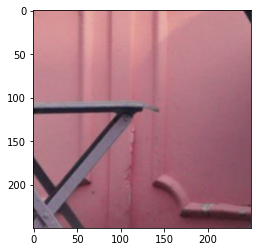

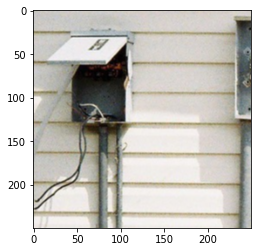

(250, 250, 3)
(250, 250, 3)


In [5]:
img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
center = (500,500)
img1_crop = cv2.getRectSubPix(img1, (250,250),center)
img2_crop = cv2.getRectSubPix(img2, (250,250),center)

img_result = np.zeros((250,250,3))

plt.imshow(img1_crop)
plt.show()
plt.imshow(img2_crop)
plt.show()

print(img1_crop.shape)
print(img2_crop.shape)

cdf_Im1_R = cdf( img1[ : , : , 0 ] )
cdf_Im2_R = cdf( img2[ : , : , 0 ] )
cdf_Im1_G = cdf( img1[ : , : , 1 ] )
cdf_Im2_G = cdf( img2[ : , : , 1 ] )
cdf_Im1_B = cdf( img1[ : , : , 2 ] )
cdf_Im2_B = cdf( img2[ : , : , 2 ] )
img_result[ : , :, 0] = hist_matching(cdf_Im1_R, cdf_Im2_R, img1[ : , : , 0])
img_result[ : , :, 1] = hist_matching(cdf_Im1_G, cdf_Im2_G, img1[ : , : , 1])
img_result[ : , :, 2] = hist_matching(cdf_Im1_B, cdf_Im2_B, img1[ : , : , 2])

plt.imshow(img_result)
